# Description:
### Using predictive models can be benefial to the healthcare industry. New technologies, such as deep neural network, can help healthcare professionals to predict cells, if they were maglignant or benign. It takes years of training for physicians to be able to diagnose cancer. Having a reliable predictive model can positively impact the efficiency of healthcare. By no means can the model replace physicians, predictive models can help physicians to prioritize their workload and focus on high-risk patients. This interesting project will use deep neural network with early stopping and dropout on the cancer dataset. 

# Project Objective:
### To develop a predictive model using deep neural network to predict if the cell is malignant or benign. The target feature or the y-variable is "benign_0__mal_1". 

# Process:
### This interesting project will start off with basic descriptive analysis, followed by exploratory data analysis, data visualization, preprocessing the data using a scaler, setting up train & test data, finally fit the data into the model. This project will be concluded with metrics, such as classification report and confusion matrix to evaluate the model's performance. 

# Potential Impact
### Potential positive impact included healthcare resouce allocation strategy, improve efficiency and the process of diagnosing a patient, and help physicians to prioritize their workload. Early recognition and diagnosis can significantly improve the chance of survival and recovery. 

### Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv("../input/cancer-classification/cancer_classification.csv")

In [3]:
data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


### An overview of the type of data

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

### Basic descriptive analysis

In [5]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'Malignancy - No:0, Yes:1')

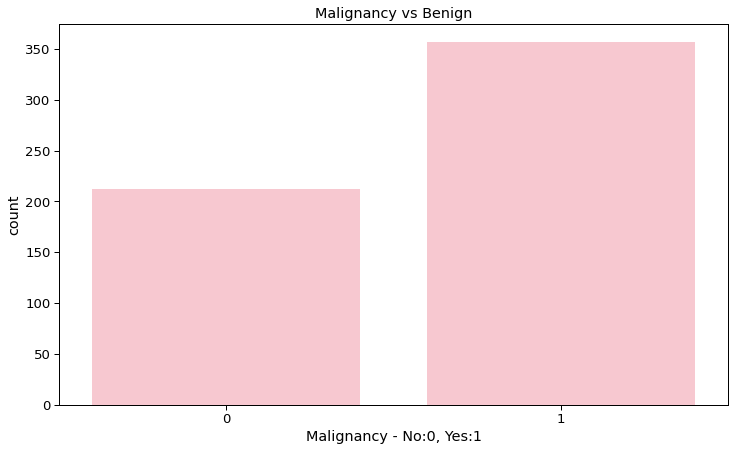

In [6]:
plt.figure(figsize=(12,7))
sns.set_context("paper", font_scale=1.5)
sns.countplot("benign_0__mal_1", data=data, color="pink")
plt.title("Malignancy vs Benign")
plt.xlabel("Malignancy - No:0, Yes:1")

### A quick glance at the correlations between features

<AxesSubplot:>

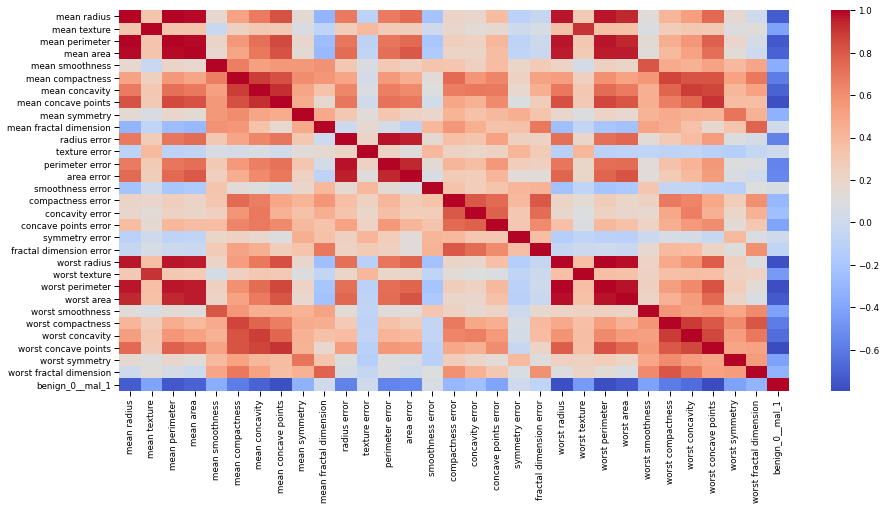

In [7]:
plt.figure(figsize=(15,7))
sns.set_context("paper")
sns.heatmap(data.corr(), cmap="coolwarm")

<AxesSubplot:>

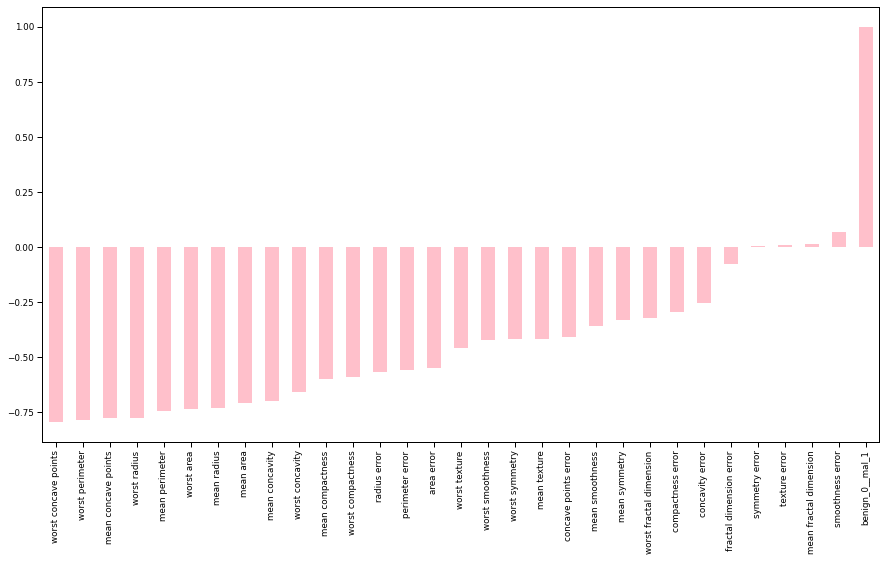

In [8]:
plt.figure(figsize=(15,8))
data.corr()["benign_0__mal_1"].sort_values().plot(kind="bar", color="pink")

### Getting ready for modeling. Setting X variable and y variable for train and test data.

In [9]:
from sklearn.model_selection import train_test_split

### Dropping the "benign_0__mal_" in X variable as it is the target feature in this predictive model. 

In [10]:
X = data.drop("benign_0__mal_1", axis=1).values
y = data["benign_0__mal_1"].values

### Test size is set at 25% of the data. Random state will be used so the random sequence will be the same each time. It is set at 101, which is an arbitrary number. 

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

### Preprocessing the data using scaler. 

In [12]:
from sklearn.preprocessing import MinMaxScaler

In [13]:
scaler = MinMaxScaler()

In [14]:
X_train = scaler.fit_transform(X_train)

In [15]:
X_test = scaler.transform(X_test)

### Importing from tensorflow.keras libraries 

In [16]:
from tensorflow.keras.models import Sequential

In [17]:
from tensorflow.keras.layers import Dense,Dropout

In [18]:
X_train.shape

(426, 30)

### Since this is a small dataset, 30 neurons will be used and then reduced to half for the second layer. Rectified linear unit will be used as the activation and Sigmoid as the final layer. Binary_crossentropy will be used as loss function as this is a binary classification. Adam will be used, which is the common optimizer. 

In [19]:
model = Sequential()

model.add(Dense(30, activation="relu"))
model.add(Dense(15, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

model.compile(loss="binary_crossentropy", optimizer="adam")

In [20]:
model.fit(x=X_train, y=y_train,epochs=600, validation_data=(X_test, y_test))

Epoch 1/600
14/14 [==============================] - 1s 40ms/step - loss: 0.6931 - val_loss: 0.6698
Epoch 2/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6637 - val_loss: 0.6433
Epoch 3/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6316 - val_loss: 0.6091
Epoch 4/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5933 - val_loss: 0.5716
Epoch 5/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5555 - val_loss: 0.5282
Epoch 6/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5043 - val_loss: 0.4754
Epoch 7/600
14/14 [==============================] - 0s 5ms/step - loss: 0.4570 - val_loss: 0.4230
Epoch 8/600
14/14 [==============================] - 0s 5ms/step - loss: 0.4065 - val_loss: 0.3784
Epoch 9/600
14/14 [==============================] - 0s 5ms/step - loss: 0.3560 - val_loss: 0.3393
Epoch 10/600
14/14 [==============================] - 0s 5ms/step - loss: 0.3331 - val_loss: 0.3119
Epoch 11

### Visualizing the loss values

In [21]:
losses = pd.DataFrame(model.history.history)

In [22]:
losses

,loss,val_loss
0,0.687034,0.669756
1,0.656337,0.643253
2,0.624232,0.609146
3,0.585746,0.571617
4,0.546032,0.528219
...,...,...
595,0.003197,0.252223
596,0.002913,0.242461
597,0.003137,0.252636
598,0.003214,0.243232


<AxesSubplot:>

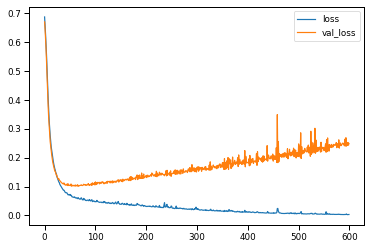

In [23]:
losses.plot()

### Adding early stopping to the model

In [24]:
model = Sequential()

model.add(Dense(30, activation="relu"))
model.add(Dense(15, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

model.compile(loss="binary_crossentropy", optimizer="adam")

In [25]:
from tensorflow.keras.callbacks import EarlyStopping

In [26]:
early_stop = EarlyStopping(monitor="val_loss", mode="min", verbose=2, patience=25)

In [27]:
model.fit(x=X_train, y=y_train,epochs=600, validation_data=(X_test, y_test), callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 1s 15ms/step - loss: 0.6708 - val_loss: 0.6378
Epoch 2/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6272 - val_loss: 0.5858
Epoch 3/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5738 - val_loss: 0.5386
Epoch 4/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5349 - val_loss: 0.4896
Epoch 5/600
14/14 [==============================] - 0s 5ms/step - loss: 0.4820 - val_loss: 0.4373
Epoch 6/600
14/14 [==============================] - 0s 5ms/step - loss: 0.4293 - val_loss: 0.3881
Epoch 7/600
14/14 [==============================] - 0s 5ms/step - loss: 0.3918 - val_loss: 0.3446
Epoch 8/600
14/14 [==============================] - 0s 5ms/step - loss: 0.3445 - val_loss: 0.3082
Epoch 9/600
14/14 [==============================] - 0s 5ms/step - loss: 0.3160 - val_loss: 0.2778
Epoch 10/600
14/14 [==============================] - 0s 5ms/step - loss: 0.2862 - val_loss: 0.2497
Epoch 11

In [28]:
model_loss = pd.DataFrame(model.history.history)

In [29]:
model_loss

,loss,val_loss
0,0.665544,0.637798
1,0.612273,0.585810
2,0.564839,0.538550
3,0.517922,0.489611
4,0.469888,0.437281
...,...,...
83,0.050853,0.106773
84,0.048200,0.113516
85,0.050361,0.103153
86,0.048931,0.108754


### With early stopping added to the model, the validation losses is better than the previous

<AxesSubplot:>

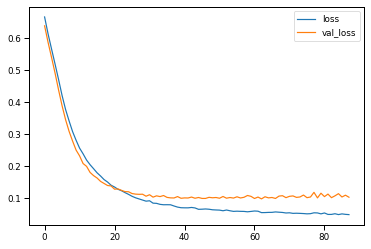

In [30]:
model_loss.plot()

### Adding dropput setting at 0.5, which is arbitrary.

In [31]:
from tensorflow.keras.layers import Dropout

In [32]:
model = Sequential()

model.add(Dense(30, activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(15, activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(1, activation="sigmoid"))

model.compile(loss="binary_crossentropy", optimizer="adam")

In [33]:
model.fit(x=X_train, y=y_train,epochs=600, validation_data=(X_test, y_test), callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 1s 15ms/step - loss: 0.7037 - val_loss: 0.6623
Epoch 2/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6808 - val_loss: 0.6396
Epoch 3/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6773 - val_loss: 0.6080
Epoch 4/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5996 - val_loss: 0.5670
Epoch 5/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6097 - val_loss: 0.5308
Epoch 6/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5416 - val_loss: 0.4908
Epoch 7/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5321 - val_loss: 0.4549
Epoch 8/600
14/14 [==============================] - 0s 5ms/step - loss: 0.4834 - val_loss: 0.4188
Epoch 9/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5319 - val_loss: 0.3947
Epoch 10/600
14/14 [==============================] - 0s 6ms/step - loss: 0.4605 - val_loss: 0.3657
Epoch 11

In [34]:
model_loss = pd.DataFrame(model.history.history)

In [35]:
model_loss

,loss,val_loss
0,0.701881,0.662281
1,0.668090,0.639584
2,0.656186,0.607962
3,0.600059,0.567004
4,0.600405,0.530773
...,...,...
155,0.100671,0.098972
156,0.090024,0.099463
157,0.079419,0.101431
158,0.073223,0.107722


### The graph below shows the significant impact on validation loss when early stopping and dropout included

<AxesSubplot:>

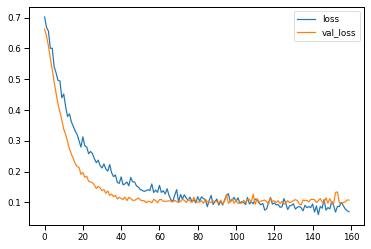

In [36]:
model_loss.plot()

In [37]:
prediction = model.predict_classes(X_test)

/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [38]:
from sklearn.metrics import classification_report, confusion_matrix

In [39]:
print(classification_report(y_test, prediction))
print(confusion_matrix(y_test, prediction))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96        55
           1       0.99      0.97      0.98        88

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143

[[54  1]
 [ 3 85]]
